In [153]:
## Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
url = r'https://raw.githubusercontent.com/natthawit-jan/car_price_prediction_proj/master/Car_Purchasing_Data.csv'
df = pd.read_csv(url)

In [155]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [157]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


Rename the column of gender to is_male, where 1 indicates male and female otherwise

In [158]:
df['Customer Name Length'] = df['Customer Name'].apply(lambda d: len(d.replace(' ', '')))
df.rename(columns={'Gender': 'Is_Male'}, inplace=True)

In [159]:
df.head()

,Customer Name,Customer e-mail,Country,Is_Male,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,Customer Name Length
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877,12
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566,12
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921,14
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313,14
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248,11


<AxesSubplot:xlabel='Customer Name Length', ylabel='Car Purchase Amount'>

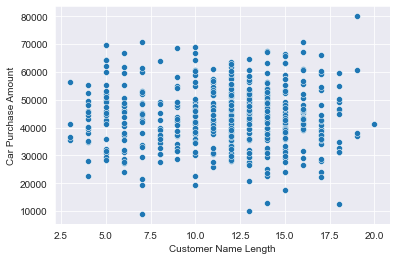

In [160]:
sns.scatterplot(data=df, x="Customer Name Length", y="Car Purchase Amount")

In [161]:
cols = [name for name in df.select_dtypes('number').columns if name != 'Car Purchase Amount']
P = df.corr().drop(columns=cols, index='Car Purchase Amount').T

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_2147/2546831319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  P = df.corr().drop(columns=cols, index='Car Purchase Amount').T


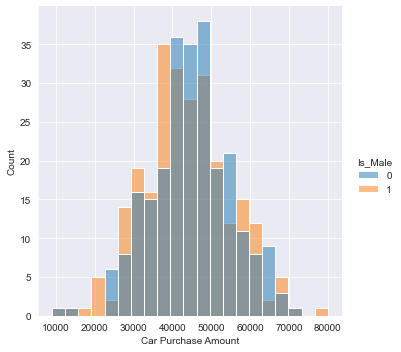

In [162]:
sns.displot(data=df, x="Car Purchase Amount", hue="Is_Male",)

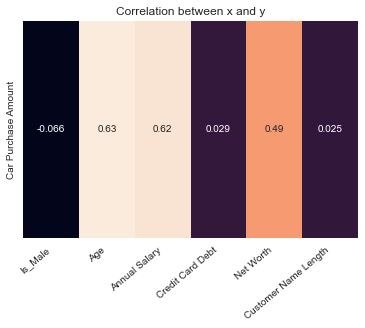

In [163]:
ax = sns.heatmap(P, annot=True, cbar=False)
ax.set_title('Correlation between x and y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

 Correlation between all dataset to see if X are related to each other (Multicorrlinearlity)

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_2147/1950817817.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cbar=False, )


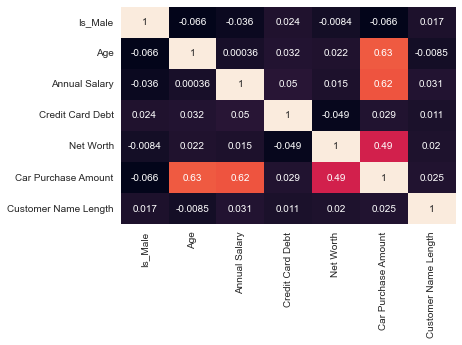

In [164]:
sns.heatmap(df.corr(), annot=True, cbar=False, )
plt.show()

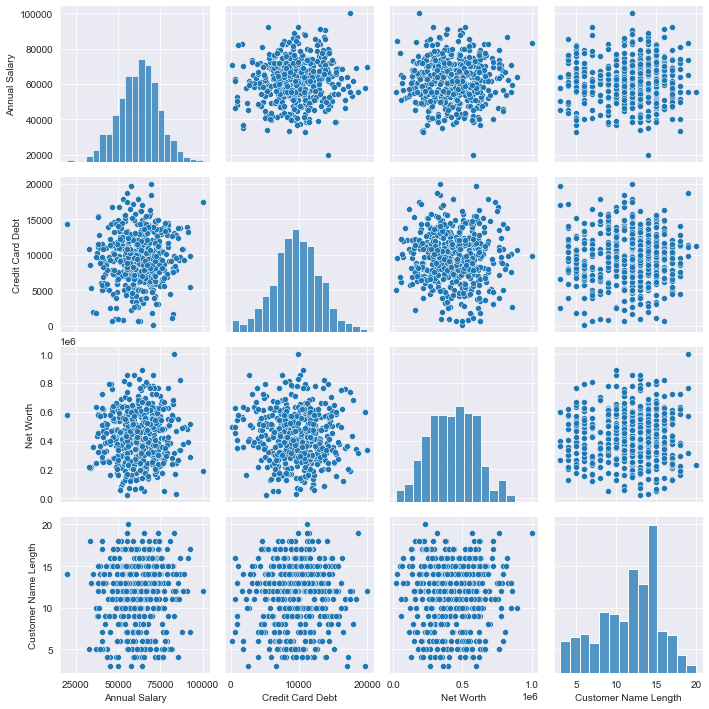

In [165]:
sns.pairplot(data=df.drop(columns=['Age', 'Is_Male', 'Car Purchase Amount']))

In [166]:
## Drop Country column since only USA is present
if 'Country' in df.columns:
    df.drop(columns='Country', inplace=True)
if 'Customer Name' in df.columns:
    df.drop(columns='Customer Name', inplace=True)

Choose to see the plots for only 3 looking-like linear feature (Age, Net Worth and Annual Salary)

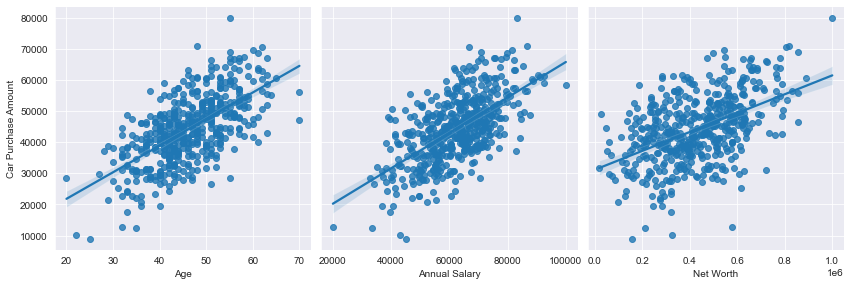

In [167]:
df.head()
x_elements = ['Age', 'Annual Salary', 'Net Worth']
y_elements = 'Car Purchase Amount'
sns.pairplot(data=df, x_vars=x_elements, y_vars=y_elements, kind="reg", height=4,)


 Therefore looking from the plots, we can see that there are mainly 3 features that look linear and can be used to train the model. *Age*, *Net Worth* and *Annual Salary*

At first trial, we will include all the features to our model to see if this will give good results

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Define X and y for the model

In [169]:
X = df[['Age', 'Annual Salary', 'Net Worth', 'Credit Card Debt', 'Is_Male']]
y = df['Car Purchase Amount']

Divide the data into train and test data. We'll use 70% for the train dataset and 30% for the test dataset.

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Create a linear regression model and fit the data with the train dataset

In [171]:
model = LinearRegression()

In [172]:
model.fit(X_train, y_train)

LinearRegression()

See beta 0 (intercept value for the regression equation)

In [173]:
print(f'The intercept (b0) = {model.intercept_}')

The intercept (b0) = -42075.96666287335


See the rest of coefficients (b1, b2, b3)

In [174]:
Y = X_train.columns
for ind, coeff in enumerate(model.coef_):
    print(f'The value of b{ind+1, Y[ind]} = {coeff}')
    ind += 1


The value of b(1, 'Age') = 840.5699256042786
The value of b(2, 'Annual Salary') = 0.5616359736360023
The value of b(3, 'Net Worth') = 0.02890614608150868
The value of b(4, 'Credit Card Debt') = 0.004796524235828898
The value of b(5, 'Is_Male') = 25.591670710519306


Now, we test our model with the test data

In [175]:
y_pred = model.predict(X_test)

In [176]:
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.999511030037329


In [177]:
import statsmodels.api as sm

In [178]:
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 1.364e+05
Date:                 Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                         15:04:03   Log-Likelihood:                -2419.8
No. Observations:                  350   AIC:                             4852.
Df Residuals:                      344   BIC:                             4875.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.208e+04    113.441   -370.905      0.000   -4.23e+04   -4.19e+04
Age                840.5699      1.688    498.081      0.000     837.251     843.889
Annual Salary        0.5616      0.001    485.732      0.000       0.559       0.564
Net Worth            0.0289   7.49e-05    385.966      0.000       0.029       0.029
Credit Card Debt     0.0048      0.004      1.286      0.199      -0.003       0.012
Is_Male             25.5917     26.459      0.967      0.334     -26.451      77.634
==============================================================================
Omnibus:                      174.931   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.387
Skew:                          -0.040   Prob(JB):                     3.74e-05
Kurtosis:                       1.820   Cond. No.                     4.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary above, we can say that credit card debt and gender features doesn't impact the car price that much, since the graph doesn't look linear and the t scores are close to 0 and p values are greater than the alpha ( 0.05 ). Thus, there are NOT statistically significant for the model.

We create another model where we take out credit debt and gender feature.

In [179]:
X = df[['Age', 'Annual Salary', 'Net Worth']]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [181]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [182]:
print(f'The intercept (b0) = {model.intercept_}')

The intercept (b0) = -41975.61441426132


In [183]:
Y = X_train.columns
for ind, coeff in enumerate(model.coef_):
    print(f'The value of b{ind+1, Y[ind]} = {coeff}')
    ind += 1

The value of b(1, 'Age') = 838.9200737084691
The value of b(2, 'Annual Salary') = 0.5621649686246198
The value of b(3, 'Net Worth') = 0.028930942913600263


In [184]:
y_pred = model.predict(X_test)
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.999417840908259


In [185]:
import statsmodels.api as sm

In [186]:
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 2.415e+05
Date:                 Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                         15:04:03   Log-Likelihood:                -2418.4
No. Observations:                  350   AIC:                             4845.
Df Residuals:                      346   BIC:                             4860.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.198e+04    103.183   -406.807      0.000   -4.22e+04   -4.18e+04
Age             838.9201      1.618    518.333      0.000     835.737     842.103
Annual Salary     0.5622      0.001    518.817      0.000       0.560       0.564
Net Worth         0.0289   7.55e-05    383.106      0.000       0.029       0.029
==============================================================================
Omnibus:                      131.113   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.119
Skew:                          -0.091   Prob(JB):                     7.05e-05
Kurtosis:                       1.870   Cond. No.                     3.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""